## 1. Problem Statement

Insurance companies need to estimate the expected cost of claims in order to price policies correctly and manage financial risk. Underestimating claim severity can lead to financial losses, while overestimating it can result in uncompetitive pricing.

The goal of this project is to build a machine learning model that predicts the severity of an insurance claim, defined as the monetary loss associated with a claim, using customer and policy attributes available at the time of underwriting.

This is a supervised regression problem, where the target variable is continuous and strictly positive. The model will ultimately be exposed as a web service that returns the expected claim amount for a given input profile.

## Dataset Description

The dataset comes from the Allstate Claims Severity competition. Each row represents an insurance claim, described by a mix of categorical and continuous features.

* id: **unique identifier**

* cat1 to cat116: **categorical features describing customer or policy attributes**

* cont1 to cont14: **continuous numerical features**

* loss: **target variable representing the claim severity**

The training set contains **188,318 rows and 132 columns**, while the test set contains **125,546 rows and 131 columns** (without the target).

## 2. Setup

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

## 3. Data Loading

In [2]:
#DATA_DIR = "data"
DATA_DIR = "allstate-claims-severity"
train_path = os.path.join(DATA_DIR, "train.csv")
test_path  = os.path.join(DATA_DIR, "test.csv")

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

train_df.shape, test_df.shape

((188318, 132), (125546, 131))

## 4. Data Overview

In [3]:
train_df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [5]:
train_df.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,188318.0,NaN,NaN,NaN,294135.982561,169336.084867,1.0,147748.25,294539.5,440680.5,587633.0
cat1,188318,2,A,141550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat2,188318,2,A,106721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat3,188318,2,A,177993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat4,188318,2,A,128395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat5,188318,2,A,123737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat6,188318,2,A,131693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat7,188318,2,A,183744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat8,188318,2,A,177274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat9,188318,2,A,113122,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_df.columns[:10].tolist(), train_df.columns[-10:].tolist()

(['id',
  'cat1',
  'cat2',
  'cat3',
  'cat4',
  'cat5',
  'cat6',
  'cat7',
  'cat8',
  'cat9'],
 ['cont6',
  'cont7',
  'cont8',
  'cont9',
  'cont10',
  'cont11',
  'cont12',
  'cont13',
  'cont14',
  'loss'])

## 5. EDA

In [7]:
# Separate feature groups
target_col = "loss"
id_col = "id"

categorical_cols = [c for c in train_df.columns if c.startswith("cat")]
continuous_cols = [c for c in train_df.columns if c.startswith("cont")]

len(categorical_cols), len(continuous_cols)

(116, 14)

In [8]:
train_df[[id_col] + continuous_cols + [target_col]].head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


#### Check for missing values

In [9]:
missing_counts = train_df.isnull().sum()
missing_counts[missing_counts > 0]

Series([], dtype: int64)

**Observation:**
No missing values are present in the dataset. This simplifies preprocessing and allows us to focus on feature encoding and target transformation rather than imputation strategies.

#### Target variable (loss) analysis

The target variable, **loss**, represents the monetary severity of an insurance claim. Since this is a financial quantity, it is strictly positive and may exhibit heavy-tailed behavior, where a small number of claims account for a disproportionately large share of total loss.

Understanding the distribution of the target variable is essential for selecting appropriate evaluation metrics, choosing suitable models, and deciding whether a transformation is necessary.

In [10]:
#Basic stats of loss
train_df["loss"].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

In [11]:
train_df["loss"].skew(), train_df["loss"].kurtosis()

(np.float64(3.7949583775378586), np.float64(48.079567825418415))

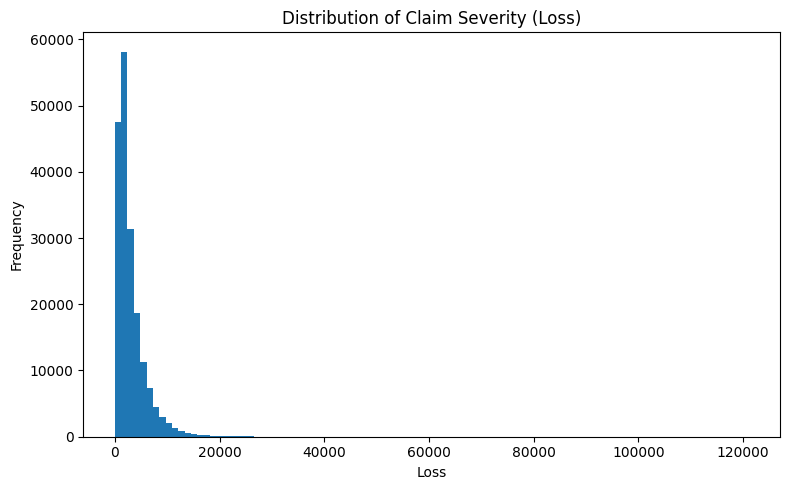

In [12]:
#Distribution plot
plt.figure(figsize=(8, 5))
plt.hist(train_df["loss"], bins=100)
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.title("Distribution of Claim Severity (Loss)")
plt.tight_layout()
plt.show()

**Observation:**

The distribution of loss is highly right-skewed, with most claims having relatively small losses and a small number of claims exhibiting very large values.

This type of distribution can negatively affect regression models that assume symmetric errors and may lead to models that focus disproportionately on extreme values. As a result, a transformation of the target variable is worth considering.

In [13]:
# Log transformation
train_df["log_loss"] = np.log1p(train_df["loss"])

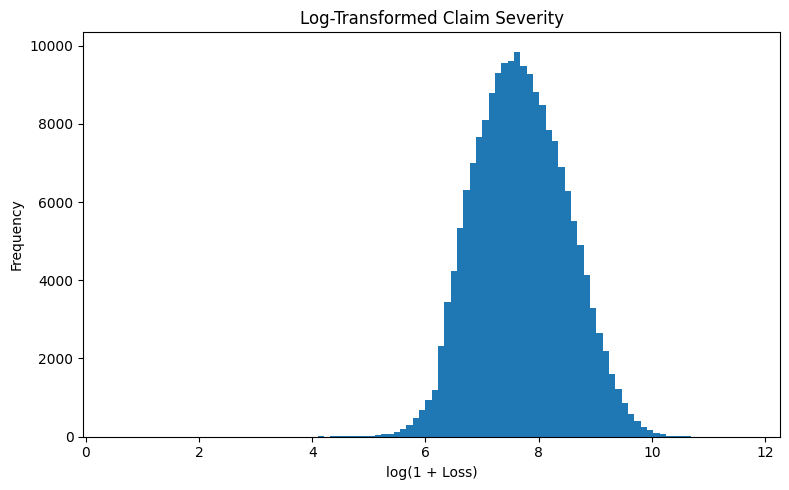

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(train_df["log_loss"], bins=100)
plt.xlabel("log(1 + Loss)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Claim Severity")
plt.tight_layout()
plt.show()

**Rationale for Transformation:**

Applying a logarithmic transformation to the target variable significantly reduces skewness and stabilizes variance. This often improves the performance of regression models, especially linear and tree-based models, and leads to more balanced error behavior across small and large claims.

In subsequent modeling steps, models will be trained to predict log_loss, and predictions will be transformed back to the original scale for interpretability.

#### Continuous feature exploration

**Continuous Feature Analysis**

The dataset contains 14 continuous numerical features (cont1 to cont14). In this section, we explore their distributions and relationships with the target variable to identify potentially informative predictors and detect any anomalies.

##### Summary statistics

In [15]:
train_df[continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
cont1,188318.0,0.493861,0.187640,0.000016,0.346090,0.475784,0.623912,0.984975
cont2,188318.0,0.507188,0.207202,0.001149,0.358319,0.555782,0.681761,0.862654
cont3,188318.0,0.498918,0.202105,0.002634,0.336963,0.527991,0.634224,0.944251
cont4,188318.0,0.491812,0.211292,0.176921,0.327354,0.452887,0.652072,0.954297
cont5,188318.0,0.487428,0.209027,0.281143,0.281143,0.422268,0.643315,0.983674
cont6,188318.0,0.490945,0.205273,0.012683,0.336105,0.440945,0.655021,0.997162
cont7,188318.0,0.484970,0.178450,0.069503,0.350175,0.438285,0.591045,1.000000
cont8,188318.0,0.486437,0.199370,0.236880,0.312800,0.441060,0.623580,0.980200
cont9,188318.0,0.485506,0.181660,0.000080,0.358970,0.441450,0.566820,0.995400
cont10,188318.0,0.498066,0.185877,0.000000,0.364580,0.461190,0.614590,0.994980


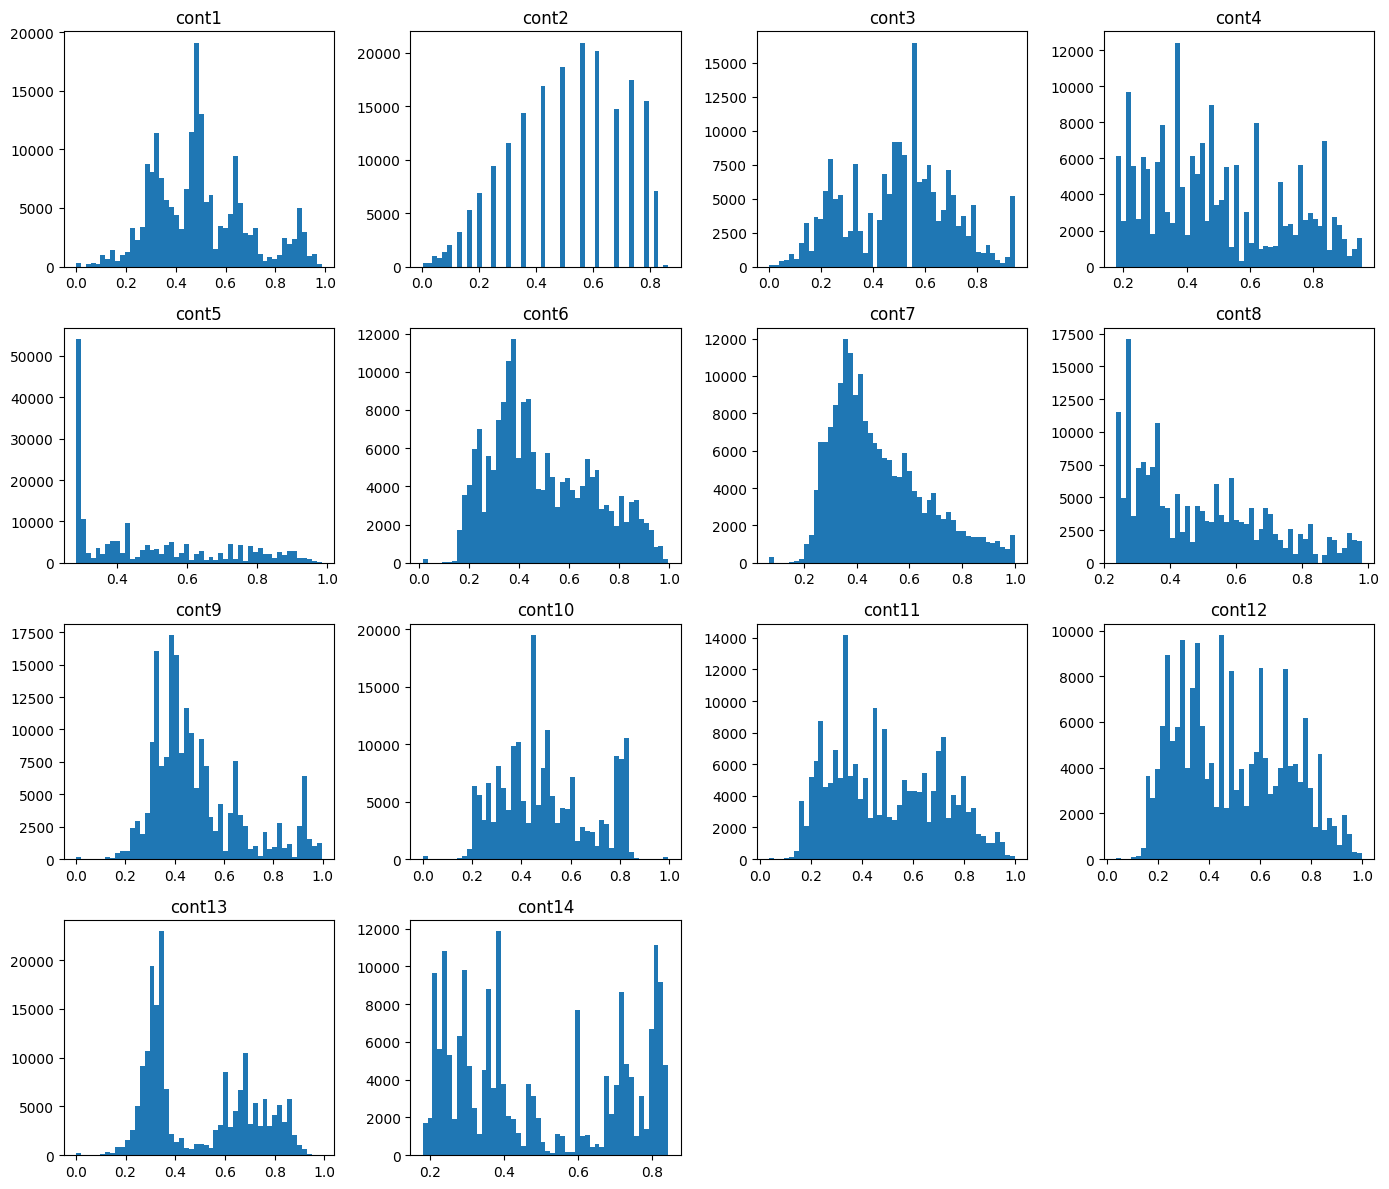

In [16]:
#Distribution plots

fig, axes = plt.subplots(4, 4, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    axes[i].hist(train_df[col], bins=50)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Observations:**

Continuous features exhibit diverse distributions, including approximately symmetric, skewed, and bounded patterns.

Several features appear normalized or scaled to specific ranges, suggesting prior preprocessing or domain-specific transformations.

No continuous feature appears constant or degenerate, indicating all features may carry some predictive signal.

In [17]:
#Correlation with target

cont_target_corr = (
    train_df[continuous_cols + ["log_loss"]]
    .corr()["log_loss"]
    .drop("log_loss")
    .sort_values(ascending=False)
)

cont_target_corr

cont2     0.104666
cont7     0.085095
cont3     0.081548
cont11    0.072760
cont12    0.072266
cont8     0.032042
cont6     0.031517
cont14    0.025948
cont9     0.017417
cont10    0.010604
cont13    0.003276
cont1    -0.007335
cont5    -0.014958
cont4    -0.027523
Name: log_loss, dtype: float64

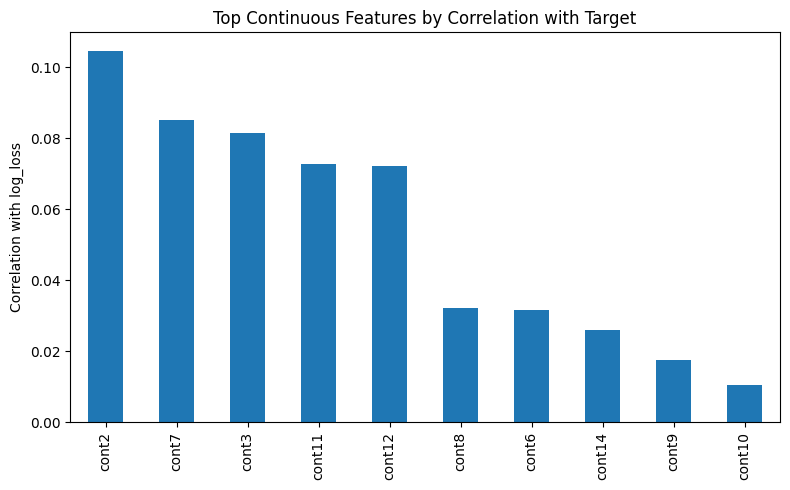

In [18]:
#top correlations

plt.figure(figsize=(8, 5))
cont_target_corr.head(10).plot(kind="bar")
plt.ylabel("Correlation with log_loss")
plt.title("Top Continuous Features by Correlation with Target")
plt.tight_layout()
plt.show()

**Interpretation:**

Several continuous features show moderate correlation with the log-transformed target, suggesting they may play an important role in predicting claim severity.

While linear correlation does not capture non-linear relationships, this analysis provides an initial ranking of potentially informative features and motivates the use of non-linear models such as tree-based ensembles.

##### Categorical Feature EDA.

**Categorical Feature Analysis**

The dataset contains a large number of categorical features (cat1 to cat116). These features vary significantly in cardinality and may encode complex, non-linear relationships with the target variable.

In this section, we analyze categorical feature cardinality and explore how selected categorical variables relate to claim severity.

In [19]:
# Cardinality analysis

cat_cardinality = train_df[categorical_cols].nunique().sort_values(ascending=False)
cat_cardinality.head(10)

cat116    326
cat110    131
cat109     84
cat113     61
cat112     51
cat115     23
cat105     20
cat107     20
cat101     19
cat114     19
dtype: int64

In [20]:
cat_cardinality.describe()

count    116.000000
mean       9.818966
std       33.666807
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max      326.000000
dtype: float64

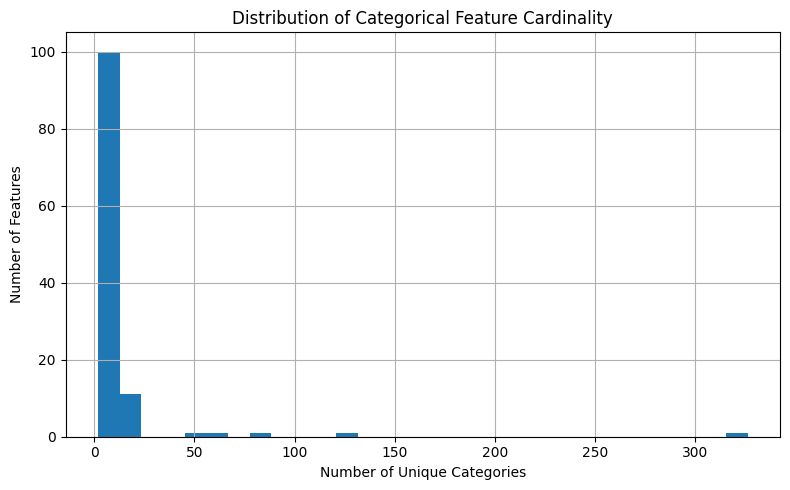

In [21]:
plt.figure(figsize=(8, 5))
cat_cardinality.hist(bins=30)
plt.xlabel("Number of Unique Categories")
plt.ylabel("Number of Features")
plt.title("Distribution of Categorical Feature Cardinality")
plt.tight_layout()
plt.show()

**Observation:**

Categorical features exhibit a wide range of cardinalities, from low-cardinality variables with only a few categories to high-cardinality variables with dozens of distinct values.

This suggests that encoding strategies must be chosen carefully to balance model expressiveness and computational efficiency, especially for linear models.

###### Target behavior across selected categories

In [22]:
# Select representative categorical features
low_card_cat = cat_cardinality.index[-1]
mid_card_cat = cat_cardinality.index[len(cat_cardinality) // 2]
high_card_cat = cat_cardinality.index[0]

low_card_cat, mid_card_cat, high_card_cat

('cat68', 'cat46', 'cat116')

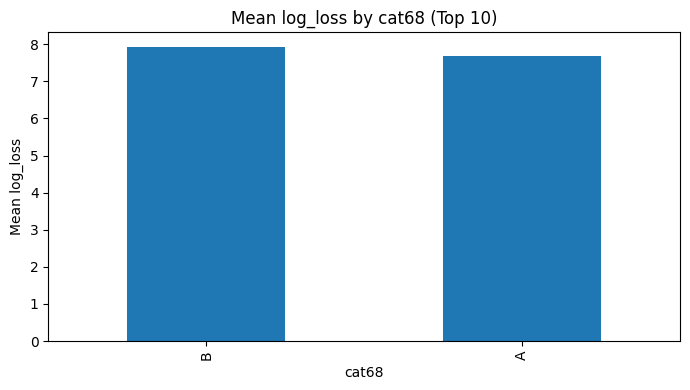

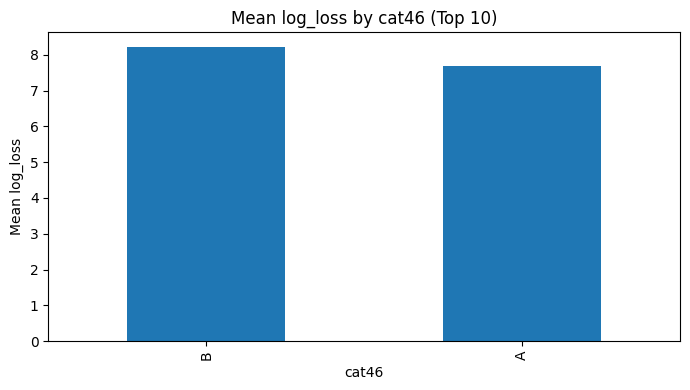

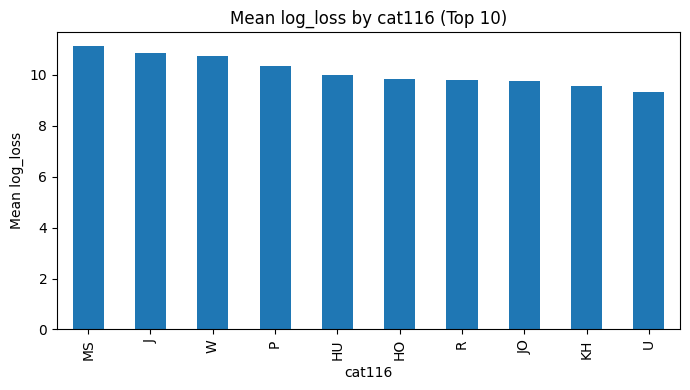

In [23]:
#mean log_loss per category

def plot_cat_target(cat_col, top_n=10):
    grouped = (
        train_df
        .groupby(cat_col)["log_loss"]
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
    )

    plt.figure(figsize=(7, 4))
    grouped.plot(kind="bar")
    plt.ylabel("Mean log_loss")
    plt.title(f"Mean log_loss by {cat_col} (Top {top_n})")
    plt.tight_layout()
    plt.show()

plot_cat_target(low_card_cat)
plot_cat_target(mid_card_cat)
plot_cat_target(high_card_cat)

**Insights:**

Categorical variables exhibit meaningful variation in average claim severity across categories.

Even high-cardinality categorical features show structured differences rather than random noise.

These observations motivate the use of models capable of capturing non-linear interactions between categorical and continuous variables, such as tree-based ensembles.

## 6. Data Splitting and Preprocessing

**Train–Validation Split Strategy**

To evaluate model performance reliably and avoid data leakage, the dataset is split into training and validation sets.

Since there is no temporal ordering in the data and the target variable is continuous, a random split is appropriate. The validation set will be used for model selection and hyperparameter tuning, while the test set remains untouched.

In [24]:
#Feature–target separation

X = train_df.drop(columns=[target_col])
y = train_df["log_loss"]

In [25]:
#drop the identifier
X = X.drop(columns=[id_col])

In [26]:
#Train–validation split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

X_train.shape, X_val.shape

((150654, 131), (37664, 131))

**Preprocessing Strategy**

Based on the exploratory analysis, the following preprocessing choices are made:

* Continuous features are already scaled to bounded ranges and do not require additional normalization for tree-based models.

* Categorical features exhibit varying cardinalities. One-hot encoding is feasible for linear models but may be inefficient for high-cardinality variables.

* Tree-based models can naturally handle ordinal-encoded categorical features without requiring explicit scaling.

To support multiple model families, preprocessing will be implemented using scikit-learn pipelines, allowing different encoders to be applied depending on the model type.

In [27]:
#Define feature lists

categorical_features = categorical_cols
numerical_features = continuous_cols

len(categorical_features), len(numerical_features)

(116, 14)

## 7. Modeling and Tuning

**Baseline Model: Linear Regression**

As a baseline, we start with a linear regression model. Despite its simplicity, this model provides a useful reference point and helps quantify how much benefit is gained from more complex, non-linear models.

Since linear models cannot directly handle categorical variables, categorical features are one-hot encoded as part of the preprocessing pipeline.

In [28]:
# Imports for baseline model

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
# compatibility helpers

import sklearn
from packaging import version

SKLEARN_VERSION = sklearn.__version__
SKLEARN_VERSION

'1.7.2'

In [30]:
from sklearn.preprocessing import OneHotEncoder

def make_ohe():
    # sklearn >= 1.2 uses sparse_output
    if version.parse(SKLEARN_VERSION) >= version.parse("1.2"):
        return OneHotEncoder(handle_unknown="ignore", sparse_output=True)
    # older sklearn uses sparse
    return OneHotEncoder(handle_unknown="ignore", sparse=True)

In [31]:
# Define preprocessor for linear model

linear_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", make_ohe(), categorical_features),
        ("num", "passthrough", numerical_features),
    ]
)

In [32]:
# Build and train the model

linear_model = Pipeline(
    steps=[
        ("preprocessor", linear_preprocessor),
        ("model", LinearRegression())
    ]
)

linear_model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
#train LR

linear_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [35]:
# Evaluate baseline performance

y_val_pred = linear_model.predict(X_val)

rmse_log = rmse(y_val, y_val_pred)
rmse_log

np.float64(0.5607222956118407)

In [36]:
# convert back to orginal scale for interpretability

y_val_pred_orig = np.expm1(y_val_pred)
y_val_orig = np.expm1(y_val)

rmse_orig = rmse(y_val_orig, y_val_pred_orig)
rmse_orig

np.float64(2187.9488299749073)

**Baseline Performance:**

RMSE (log scale)≈ 0.5607

RMSE (original scale)≈ 2187.95

While the linear regression model captures some signal in the data, its performance is limited by its inability to model non-linear interactions and complex relationships between features.

**Tree-Based Baseline Model**

Linear regression provides a useful baseline but cannot capture non-linear feature interactions. As a stronger baseline, we train a gradient-boosted tree model.

To handle categorical variables efficiently, we apply ordinal encoding. While ordinal encoding imposes an arbitrary ordering on categories, tree-based models can still extract useful splits and interactions from these encoded values.

In [37]:
# imports

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingRegressor

In [38]:
# preprocessing + pipeline

tree_preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_features),
        ("num", "passthrough", numerical_features),
    ]
)

tree_model = Pipeline(
    steps=[
        ("preprocessor", tree_preprocessor),
        ("model", HistGradientBoostingRegressor(random_state=RANDOM_STATE))
    ]
)

tree_model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
# train + evaluate

tree_model.fit(X_train, y_train)

y_val_pred_tree = tree_model.predict(X_val)
rmse_log_tree = rmse(y_val, y_val_pred_tree)

y_val_pred_tree_orig = np.expm1(y_val_pred_tree)
rmse_orig_tree = rmse(y_val_orig, y_val_pred_tree_orig)

rmse_log_tree, rmse_orig_tree

(np.float64(0.5383494167738203), np.float64(1935.0703674275328))

The HistGradientBoostingRegressor baseline tree model improved both metrics:

**Linear baseline:** RMSE(log) ≈ 0.5607, RMSE(orig) ≈ 2187.95

**HGBR baseline:** RMSE(log) ≈ 0.53835, RMSE(orig) ≈ 1935.07

**Hyperparameter Tuning**

To improve performance, we tune key hyperparameters of the gradient-boosted tree model.

We focus on parameters that control model capacity and regularization:

* learning_rate: step size for boosting

* max_depth: depth of individual trees

* max_leaf_nodes: complexity of trees

* min_samples_leaf: regularization to reduce overfitting

The validation set is used to compare configurations using RMSE in log space.

In [40]:
# hyperparemeter tuning

from itertools import product

param_grid = {
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 6, None],
    "model__max_leaf_nodes": [31, 63],
    "model__min_samples_leaf": [20, 50],
}

grid_keys = list(param_grid.keys())
grid_values = list(param_grid.values())

results = []

for values in product(*grid_values):
    params = dict(zip(grid_keys, values))

    tuned_model = Pipeline(
        steps=[
            ("preprocessor", tree_preprocessor),
            ("model", HistGradientBoostingRegressor(random_state=RANDOM_STATE))
        ]
    )

    tuned_model.set_params(**params)
    tuned_model.fit(X_train, y_train)

    y_pred = tuned_model.predict(X_val)
    score = rmse(y_val, y_pred)

    results.append((score, params))

results_sorted = sorted(results, key=lambda x: x[0])
results_sorted[:5]

[(np.float64(0.535863949178839),
  {'model__learning_rate': 0.1,
   'model__max_depth': None,
   'model__max_leaf_nodes': 63,
   'model__min_samples_leaf': 50}),
 (np.float64(0.5361219337593349),
  {'model__learning_rate': 0.1,
   'model__max_depth': None,
   'model__max_leaf_nodes': 63,
   'model__min_samples_leaf': 20}),
 (np.float64(0.5382608590875362),
  {'model__learning_rate': 0.1,
   'model__max_depth': None,
   'model__max_leaf_nodes': 31,
   'model__min_samples_leaf': 50}),
 (np.float64(0.5383494167738203),
  {'model__learning_rate': 0.1,
   'model__max_depth': None,
   'model__max_leaf_nodes': 31,
   'model__min_samples_leaf': 20}),
 (np.float64(0.5400981376879346),
  {'model__learning_rate': 0.1,
   'model__max_depth': 6,
   'model__max_leaf_nodes': 63,
   'model__min_samples_leaf': 50})]

In [41]:
# pick best model and re-evaluate on both scales

best_rmse_log, best_params = results_sorted[0]
best_rmse_log, best_params

(np.float64(0.535863949178839),
 {'model__learning_rate': 0.1,
  'model__max_depth': None,
  'model__max_leaf_nodes': 63,
  'model__min_samples_leaf': 50})

In [42]:
best_tree_model = Pipeline(
    steps=[
        ("preprocessor", tree_preprocessor),
        ("model", HistGradientBoostingRegressor(random_state=RANDOM_STATE))
    ]
).set_params(**best_params)

best_tree_model.fit(X_train, y_train)

y_val_pred_best = best_tree_model.predict(X_val)
rmse_log_best = rmse(y_val, y_val_pred_best)

y_val_pred_best_orig = np.expm1(y_val_pred_best)
rmse_orig_best = rmse(y_val_orig, y_val_pred_best_orig)

rmse_log_best, rmse_orig_best

(np.float64(0.535863949178839), np.float64(1917.3637360896564))

**Best Gradient Boosted Tree Configuration:**

* learning_rate: 0.1

* max_depth: None

* max_leaf_nodes: 63

* min_samples_leaf: 50

This configuration provided the lowest validation RMSE in log space among the tested parameter combinations.

**Tuned Model Performance:**

* RMSE (log scale): 0.5359

* RMSE (original scale): 1917.36

Hyperparameter tuning resulted in a modest but consistent improvement over the untuned model, confirming the benefit of controlling model complexity and regularization.

**Alternative Tree Model: Random Forest**

To validate that the performance gains are not specific to one algorithm, we train a Random Forest regressor. Random Forests are robust, handle non-linear relationships well, and provide a strong secondary baseline for comparison.

We use the same preprocessing approach (ordinal encoding for categorical features) and tune key parameters controlling model capacity

In [43]:
# import

from sklearn.ensemble import RandomForestRegressor

In [44]:
# baseline Random Forest

rf_model = Pipeline(
    steps=[
        ("preprocessor", tree_preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1
        ))
    ]
)

rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
rmse_log_rf = rmse(y_val, y_val_pred_rf)

y_val_pred_rf_orig = np.expm1(y_val_pred_rf)
rmse_orig_rf = rmse(y_val_orig, y_val_pred_rf_orig)

rmse_log_rf, rmse_orig_rf

(np.float64(0.5584141256732649), np.float64(2020.8158388789302))

In [ ]:
# small tuning grid

rf_param_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 20],
    "model__max_features": ["sqrt", 0.5],
}

rf_keys = list(rf_param_grid.keys())
rf_values = list(rf_param_grid.values())

rf_results = []

for values in product(*rf_values):
    params = dict(zip(rf_keys, values))

    model = Pipeline(
        steps=[
            ("preprocessor", tree_preprocessor),
            ("model", RandomForestRegressor(
                random_state=RANDOM_STATE,
                n_jobs=-1
            ))
        ]
    ).set_params(**params)

    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    score = rmse(y_val, preds)

    rf_results.append((score, params))

rf_results_sorted = sorted(rf_results, key=lambda x: x[0])
rf_results_sorted[:5]

[(np.float64(0.552581357898134),
  {'model__n_estimators': 600,
   'model__max_depth': None,
   'model__min_samples_leaf': 1,
   'model__max_features': 'sqrt'}),
 (np.float64(0.5528254801963515),
  {'model__n_estimators': 600,
   'model__max_depth': 20,
   'model__min_samples_leaf': 1,
   'model__max_features': 0.5}),
 (np.float64(0.5530830340209212),
  {'model__n_estimators': 300,
   'model__max_depth': None,
   'model__min_samples_leaf': 1,
   'model__max_features': 'sqrt'}),
 (np.float64(0.5531532991363527),
  {'model__n_estimators': 300,
   'model__max_depth': 20,
   'model__min_samples_leaf': 1,
   'model__max_features': 0.5}),
 (np.float64(0.5535747887867432),
  {'model__n_estimators': 600,
   'model__max_depth': None,
   'model__min_samples_leaf': 1,
   'model__max_features': 0.5})]

In [48]:
best_rf_rmse_log, best_rf_params = rf_results_sorted[0]
best_rf_rmse_log, best_rf_params

(np.float64(0.552581357898134),
 {'model__n_estimators': 600,
  'model__max_depth': None,
  'model__min_samples_leaf': 1,
  'model__max_features': 'sqrt'})

In [49]:
# evaluate

best_rf_model = Pipeline(
    steps=[
        ("preprocessor", tree_preprocessor),
        ("model", RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1))
    ]
).set_params(**best_rf_params)

best_rf_model.fit(X_train, y_train)

y_val_pred_rf_best = best_rf_model.predict(X_val)
rmse_log_rf_best = rmse(y_val, y_val_pred_rf_best)

y_val_pred_rf_best_orig = np.expm1(y_val_pred_rf_best)
rmse_orig_rf_best = rmse(y_val_orig, y_val_pred_rf_best_orig)

rmse_log_rf_best, rmse_orig_rf_best

(np.float64(0.552581357898134), np.float64(2066.1726901561515))

**Model Comparison**

The following table summarizes validation performance across the evaluated models. RMSE is reported both in log space (the training objective) and in the original loss scale (for interpretability). The tuned gradient-boosted tree model achieves the best overall performance and is selected for deployment.

In [50]:
results_table = pd.DataFrame([
    {"model": "Linear Regression (One-Hot)", "rmse_log": 0.5607222956118407, "rmse_orig": 2187.9488299749073},
    {"model": "HistGradientBoosting (Ordinal)", "rmse_log": 0.5383494167738203, "rmse_orig": 1935.0703674275328},
    {"model": "HistGradientBoosting (Tuned)", "rmse_log": 0.535863949178839, "rmse_orig": 1917.3637360896564},
    {"model": "RandomForest (Ordinal)", "rmse_log": 0.5584141256732649, "rmse_orig": 2020.8158388789302},
    {"model": "RandomForest (Tuned)", "rmse_log": 0.552581357898134, "rmse_orig": 2066.1726901561515},
]).sort_values("rmse_log")

results_table

,model,rmse_log,rmse_orig
2,HistGradientBoosting (Tuned),0.535864,1917.363736
1,HistGradientBoosting (Ordinal),0.538349,1935.070367
4,RandomForest (Tuned),0.552581,2066.172690
3,RandomForest (Ordinal),0.558414,2020.815839
0,Linear Regression (One-Hot),0.560722,2187.948830


In [51]:
results_table.style.format({"rmse_log": "{:.4f}", "rmse_orig": "{:.2f}"})

,model,rmse_log,rmse_orig
2,HistGradientBoosting (Tuned),0.5359,1917.36
1,HistGradientBoosting (Ordinal),0.5383,1935.07
4,RandomForest (Tuned),0.5526,2066.17
3,RandomForest (Ordinal),0.5584,2020.82
0,Linear Regression (One-Hot),0.5607,2187.95


**Final Model Training and Export**

The selected model is retrained on the full training dataset (train + validation combined) to maximize the use of available labeled data. The trained pipeline is saved as a serialized artifact and will be used later in the prediction service.

In [52]:
#train final

X_full = train_df.drop(columns=[target_col, id_col])
y_full = train_df["log_loss"]

final_model = Pipeline(
    steps=[
        ("preprocessor", tree_preprocessor),
        ("model", HistGradientBoostingRegressor(
            random_state=RANDOM_STATE,
            learning_rate=0.1,
            max_depth=None,
            max_leaf_nodes=63,
            min_samples_leaf=50,
        ))
    ]
)

final_model.fit(X_full, y_full)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
# save

import pickle
from pathlib import Path

ARTIFACT_DIR = Path("artifacts")
ARTIFACT_DIR.mkdir(exist_ok=True)

model_path = ARTIFACT_DIR / "claim_severity_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(final_model, f)

model_path

WindowsPath('artifacts/claim_severity_model.pkl')

## 8. Final Model and Export

**Final Model Selection**

Among the evaluated models, the tuned gradient-boosted tree model achieved the best performance on the validation set while maintaining reasonable complexity and training time.

This model is selected as the final model for deployment.

## 9. Inference Test

**Inference Test**

Before deploying the model as a web service, we perform a simple inference test using a single example from the dataset. This verifies that the serialized pipeline can be loaded and used to generate predictions end-to-end.

In [54]:
#load saved model

with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)

loaded_model

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
#single row prediction

# take one example
sample_row = X_full.iloc[[0]]

# predict in log space
sample_log_pred = loaded_model.predict(sample_row)[0]

# convert back to original scale
sample_pred = np.expm1(sample_log_pred)

sample_log_pred, sample_pred

(np.float64(7.540578463445343), np.float64(1881.9189099522562))

**Inference Result:**

The model successfully generated a prediction for a single input instance. This confirms that the preprocessing steps and model are correctly encapsulated within the serialized pipeline and are ready to be served via an API.

In [60]:
X_full = train_df.drop(columns=[target_col, "log_loss", id_col])

In [61]:
sample = X_full.iloc[0].to_dict()
sample


{'cat1': 'A',
 'cat2': 'B',
 'cat3': 'A',
 'cat4': 'B',
 'cat5': 'A',
 'cat6': 'A',
 'cat7': 'A',
 'cat8': 'A',
 'cat9': 'B',
 'cat10': 'A',
 'cat11': 'B',
 'cat12': 'A',
 'cat13': 'A',
 'cat14': 'A',
 'cat15': 'A',
 'cat16': 'A',
 'cat17': 'A',
 'cat18': 'A',
 'cat19': 'A',
 'cat20': 'A',
 'cat21': 'A',
 'cat22': 'A',
 'cat23': 'B',
 'cat24': 'A',
 'cat25': 'A',
 'cat26': 'A',
 'cat27': 'A',
 'cat28': 'A',
 'cat29': 'A',
 'cat30': 'A',
 'cat31': 'A',
 'cat32': 'A',
 'cat33': 'A',
 'cat34': 'A',
 'cat35': 'A',
 'cat36': 'A',
 'cat37': 'A',
 'cat38': 'A',
 'cat39': 'A',
 'cat40': 'A',
 'cat41': 'A',
 'cat42': 'A',
 'cat43': 'A',
 'cat44': 'A',
 'cat45': 'A',
 'cat46': 'A',
 'cat47': 'A',
 'cat48': 'A',
 'cat49': 'A',
 'cat50': 'A',
 'cat51': 'A',
 'cat52': 'A',
 'cat53': 'A',
 'cat54': 'A',
 'cat55': 'A',
 'cat56': 'A',
 'cat57': 'A',
 'cat58': 'A',
 'cat59': 'A',
 'cat60': 'A',
 'cat61': 'A',
 'cat62': 'A',
 'cat63': 'A',
 'cat64': 'A',
 'cat65': 'A',
 'cat66': 'A',
 'cat67': 'A',
 'ca

In [62]:
import json

sample = X_full.iloc[0].to_dict()
payload = {"features": sample}

print(json.dumps(payload, indent=2))

{
  "features": {
    "cat1": "A",
    "cat2": "B",
    "cat3": "A",
    "cat4": "B",
    "cat5": "A",
    "cat6": "A",
    "cat7": "A",
    "cat8": "A",
    "cat9": "B",
    "cat10": "A",
    "cat11": "B",
    "cat12": "A",
    "cat13": "A",
    "cat14": "A",
    "cat15": "A",
    "cat16": "A",
    "cat17": "A",
    "cat18": "A",
    "cat19": "A",
    "cat20": "A",
    "cat21": "A",
    "cat22": "A",
    "cat23": "B",
    "cat24": "A",
    "cat25": "A",
    "cat26": "A",
    "cat27": "A",
    "cat28": "A",
    "cat29": "A",
    "cat30": "A",
    "cat31": "A",
    "cat32": "A",
    "cat33": "A",
    "cat34": "A",
    "cat35": "A",
    "cat36": "A",
    "cat37": "A",
    "cat38": "A",
    "cat39": "A",
    "cat40": "A",
    "cat41": "A",
    "cat42": "A",
    "cat43": "A",
    "cat44": "A",
    "cat45": "A",
    "cat46": "A",
    "cat47": "A",
    "cat48": "A",
    "cat49": "A",
    "cat50": "A",
    "cat51": "A",
    "cat52": "A",
    "cat53": "A",
    "cat54": "A",
    "cat55": "A",
 

In [58]:
import json

sample = X_full.iloc[0].to_dict()
payload = {"features": sample}

with open("sample_request.json", "w") as f:
    json.dump(payload, f, indent=2)

print("Saved sample_request.json")


Saved sample_request.json


In [59]:
import json

sample = X_full.iloc[0].to_dict()

# defensive cleanup (in case someone uses the wrong dataframe)
sample.pop("loss", None)
sample.pop("log_loss", None)
sample.pop("id", None)

payload = {"features": sample}

with open("sample_request.json", "w") as f:
    json.dump(payload, f, indent=2)

print("Saved sample_request.json")

Saved sample_request.json


## 10. Next Steps (Deployment)